# Data Structures
- Data Structures are a specialized means of organizing and storing data in computers in such a way that we can perform operations on the stored data more efficiently.
- In conclusion, data structure designs the ways how data is organized and stored in the computer
- For instance, list, set, and dictionary are data structures
- N.Wirth: 'Program = Data structures + algorithm'
- Data structure can be divided into linear structure, tree structure, and graph structure according to its logic
    - Linear structure: Elements have **one to one** relation
    - Tree structure: Elements have **one to many** relation
    - Graph structure: Elements have **many to many** relation

# Linear Structure
## List/Array
- List （Array in other language) is a basic type of data structure
- Questions regarding list:
    - How are elements stored in the list
        -  **Array stores the actual num while list stores the address of the number**
    - List basic operation: find according to the index, insert elements, delete elements...
    - What are the time complexity of these operation?
        - append() -> O(1)
        - delete() and insert() -> O(n)
- How does python realize list?
- Difference between array and list:
    1. Array requires all the elements have the same data type
    2. Array has defined length

## Stack
- Stake is a set of data. It can considered as a list which is only inserted or deleted in one side
- **LIFO** (Last in, first out)
- Basic operations:
    - push -> push an element into the stack
    - pop -> pop an element out of the stack
    - gettop -> get the top of the stack
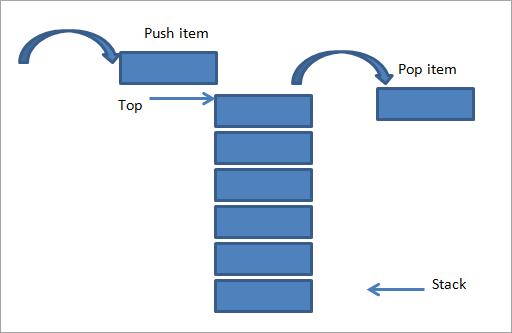
- Realization of stack: Generally, it can be realized by a list
    - push <=> li.append
    - pop <=> li.pop
    - gettop <=> li[-1]

In [24]:
class Stack:
    def __init__(self):
        self.stack = []
    
    def push(self,element):
        self.stack.append(element)
    
    def pop(self):
        if len(self.stack) > 0:
            self.stack.pop()
        else:
            raise IndexError("Stack is empty")
    
    def get_top(self):
        if len(self.stack) > 0:
            return self.stack[-1]
        else:
            raise IndexError("Stack is empty")
        
    def is_empty(self):
        return len(self.stack)==0

### Stack Application -- Valid Parentheses
Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

An input string is valid if:

    1. Open brackets must be closed by the same type of brackets.
    2. Open brackets must be closed in the correct order.

In [27]:
def parentheses_match(s):
    stack = Stack()
    match = {'}':'{',']':'[',')':'('}
    for ch in s:
        if ch in {'(','[','{'}:
            stack.push(ch)
        else:
            if stack.is_empty():
                return False
            elif stack.get_top() == match[ch]:
                stack.pop()
            else: # not matching
                return False
    if stack.is_empty():
        return True
    else:
        return False

## Queue
- Queue is a data set which only allows list to be inserted from one side while deleted from the other side
- Insertion side is called rear -> Enqueue
- Deletion side is called front -> Dequeue
- **FIFO**(First in, first out)
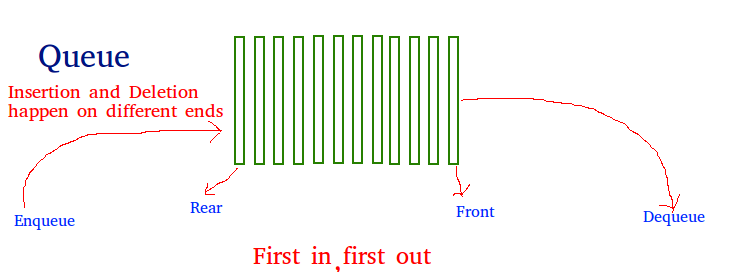
- Queue is hard to be realized by list --> Waste of memory
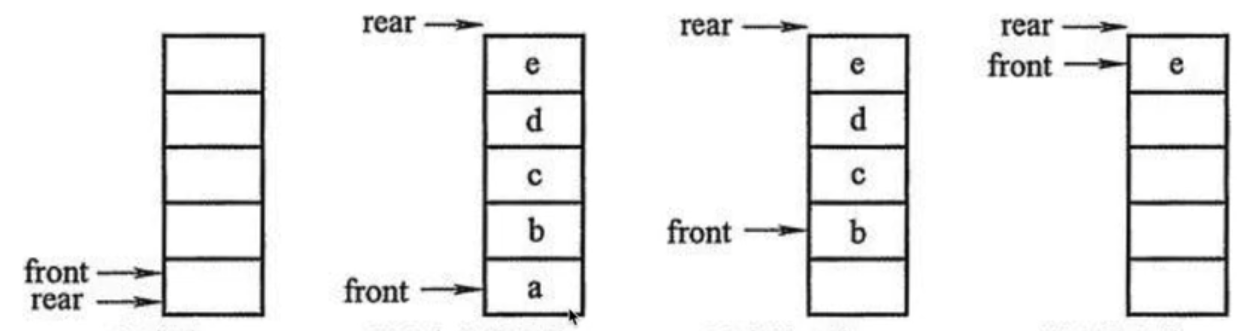
- Instead, use circular list:
    - When front = Maxsize +1, forward one step to 0
        - Front forward one step:``` front = (front+1) % MaxSize```
        - Rear forward one step:``` rear = (rear+1) % MaxSize```
        - Empty condition: ```rear == front```
        - Full condition: ```(rear+1) % MaxSize == front```
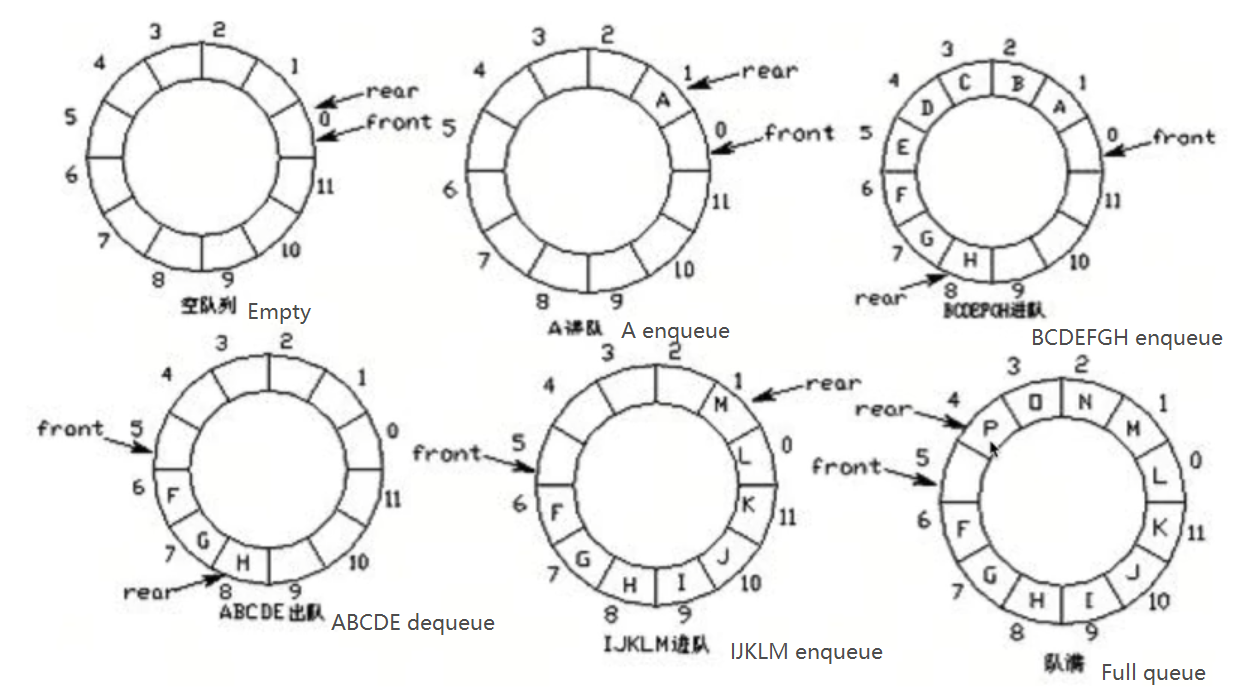


In [34]:
class Queue():
    def __init__(self,size=100):
        self.queue = [0 for _ in range(size)]
        self.rear = 0
        self.front = 0
        self.size = size
    
    def push(self,element):
        if not self.is_full():
            self.rear = (self.rear+1) % self.size
            self.queue[self.rear] = element
        else:
            raise IndexError("Queue is full")
    def pop(self):
        if not self.is_empty():
            self.front = (self.front+1)% self.size
            return self.queue[self.front]
        else:
            raise IndexError("Queue is empty")
    def is_empty(self):
        return self.rear == self.front
    
    def is_full(self):
        return (self.rear+1)%self.size == self.front

### Double-ended queue
- Supports enqueue and dequeue in both ends
- Basic operations:
    - Front enqueue
    - Front dequeue
    - Rear enqueue
    - Rear dequeue
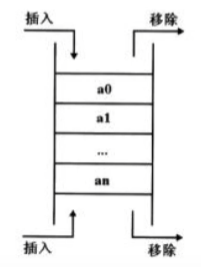

In [42]:
from collections import deque
q = deque()
q.append(1) # Rear enqueue
print(q.popleft()) # Front dequeue

q.appendleft(1) # Front enqueue
q.pop() # Rear dequeue

1


1

## Stack and Queue Application - Maze problem
Given a 2D array to reprensent a maze (0 is path, 1 is wall). Find the path out of the maze
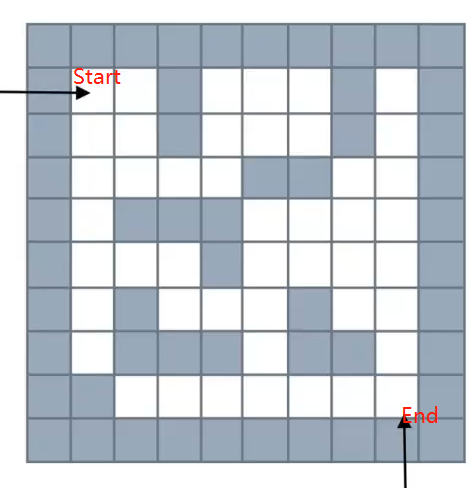
### Stack -- Depth First Search (DFS)
- *Backtarcking*
- Idea: Starting from a node, find any point with can step forward. If blocked, step back to the previous point to find if there is another point in other direction
- **Use stack to store current path**
- One path a time


In [52]:
maze = [
    [1,1,1,1,1,1,1,1,1,1],
    [1,0,0,1,0,0,0,1,0,1],
    [1,0,0,1,0,0,0,1,0,1],
    [1,0,0,0,0,1,1,0,0,1],
    [1,0,1,1,1,0,0,0,0,1],
    [1,0,0,0,1,0,0,0,0,1],
    [1,0,1,0,0,0,1,0,0,1],
    [1,0,1,1,1,0,1,1,0,1],
    [1,1,0,0,0,0,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1]
]

dirs = [
    lambda x,y:(x+1,y),
    lambda x,y:(x-1,y),
    lambda x,y:(x,y+1),
    lambda x,y:(x,y-1)
]
def maze_path(x1,y1,x2,y2):
    stack = []
    stack.append((x1,y1))
    while(len(stack)>0):
        curNode = stack[-1]
        if curNode[0] == x2 and curNode[1] == y2:
            # Reach the end
            for p in stack:
                print(p)
            return True
        # four directions
        for dir in dirs:
            nextNode = dir(curNode[0],curNode[1])
            # if next node can be stepped
            if maze[nextNode[0]][nextNode[1]] == 0:
                stack.append(nextNode)
                maze[nextNode[0]][nextNode[1]] = 2 # 2 represents already visited
                break
        else:
            maze[nextNode[0]][nextNode[1]] = 2
            stack.pop()
    else:
        print('no path')
        return False
    
maze_path(1,1,8,8)

### Queue -- Breadth First Search (BFS)
- Idea: Starting from a node, search through all the possible path that can be visited until the end
- Use queue to store the current node
- Multiple paths at the same time 
- Return shortest path
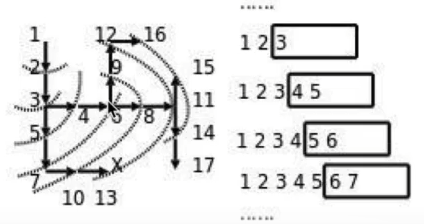
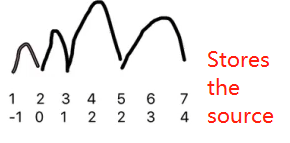

In [ ]:
from collections import deque
maze = [
    [1,1,1,1,1,1,1,1,1,1],
    [1,0,0,1,0,0,0,1,0,1],
    [1,0,0,1,0,0,0,1,0,1],
    [1,0,0,0,0,1,1,0,0,1],
    [1,0,1,1,1,0,0,0,0,1],
    [1,0,0,0,1,0,0,0,0,1],
    [1,0,1,0,0,0,1,0,0,1],
    [1,0,1,1,1,0,1,1,0,1],
    [1,1,0,0,0,0,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1]
]

dirs = [
    lambda x,y:(x+1,y),
    lambda x,y:(x-1,y),
    lambda x,y:(x,y+1),
    lambda x,y:(x,y-1)
]

def print_r(path):
    curNode = path[-1]
    realpath = []
    while curNode[2] != -1:
        realpath.append(curNode[0:2])
        curNode = path[curNode[2]]
    realpath.append(curNode[0:2]) # beginning
    realpath.reverse()
    for node in realpath:
        print(node)
    
def maze_path_queue(x1,y1,x2,y2):
    queue = deque()
    queue.append((x1,y1,-1))
    path = []
    while len(queue)>0:
        curNode = queue.pop()
        path.append(curNode)
        if curNode[0] == x2 and curNode[1] == y2:
            # End
            print_r(path)
            return True
        for dir in dirs:
            nextNode = dir(curNode[0],curNode[1])
            if maze[nextNode[0]][nextNode[1]]==0:
                queue.append((nextNode[0],nextNode[1],len(path)-1)) # Append next node into the queue, record which node brings it in
                maze[nextNode[0]][nextNode[1]]=2 # Mark as visited
    else: 
        print('no path')
        return False
    
maze_path_queue(1,1,8,8)              

## Linked List 
- Linked List is a sequence of links which contains items. Each link contains a connection to another link. Linked list is the second most-used data structure after array
- Create linked list:
    - Head insertion
    - Tail insertion
- **Delete and insertion has time complexity of O(1)** (Compare with normal list O(n))
Types of linked list:
- Simple linked list - Item navigation is forward only
- Doubly linked list - Items can be navigated forward and backward
- Circular linked list - Last item contains link of the first element as next and the first element has a link to the last element as previous
- Advantages of linked list:
    - Insertion and Deletion is significantly faster than list
    - More flexible memory allocation ->  Can be extended
    - Insights for tree and graph structure
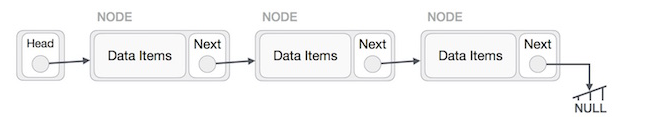

In [61]:
class Node:
    def __init__(self,item):
        self.item = item
        self.next = None

In [65]:
def create_linkedlist_head(li):
    head = Node(li[0])
    for element in li[1:]:
        node = Node(element)
        node.next = head
        head = node
    return head

def create_linkedlist_tail(li):
    head = Node(li[0])
    tail = head
    for element in li[1:]:
        node = Node(element)
        tail.next = node
        tail = node
    return head

## Hash Table
- Hash Table is a data structure which stores data in an associative manner. In a hash table, data is stored in an array format, where each data value has its own unique index value. Access of data becomes very fast if we know the index of the desired data.
    - insert(key,vale): insert key-value pair
    - get(key): if the key exist then return its value, otherwise return None
    - delete(key): delete specified key-value pair
- Hashing technique: 
    - Hashing is the process of transforming any given key or a string of characters into another value
    - **Normally, people use ```num % size``` as the hash function**
    - Comflicts: Two or more values map to the same location
        - Linear probing: if location i is occupied, then search i+1,i+2 ... -> O(1)
        - Quadratic probing: if location is occupied, then search i+1^2, i+2^2... -> O(1)
        - Multiple hashing: use multiple hash functions. Once h1 has comflicts, use h2, h3... -> O(1)
        - Linked list: link every location of the hash table to a linked list. When comflicts happen, the comflicted element will be append to the end of the linked list -> O(1)<O<O(logn)
     - Time complexity depends on the hash function
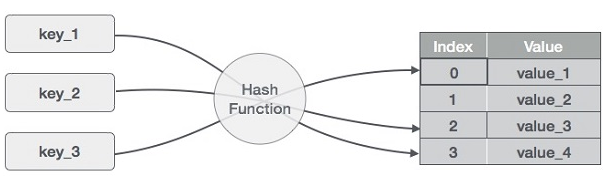

In [71]:
class LinkedList:
    class Node:
        def __init__(self,item =None):
            self.item = item
            self.next = None
        
    class LinkedListIterator:
        def __init__(self,node):
            self.node = node
        def __next__(self):
            if self.node:
                cur_node = self.node
                self.node = cur_node.next
                return cur_node.item
            else:
                raise StopIteration
        def __iter__(self):
            return self
    def __init__(self,iterable=None):
        self.head = None
        self.tail = None
        if iterable:
            self.extend(iterable)
    
    def append(self,obj):
        s = Linkedlist.Node(obj)
        if not self.head:
            self.head = s
            self.tail = s
        else:
            self.tail.next = s
            self.tail = s
            
    def extend(self,iterable):
        for obj in iterable:
            self.append(obj)
            
    def find(self,obj):
        for n in self:
            if n ==obj:
                return True
            else:
                return False
            
    def __iter__(self):
        return self.LinkedListIterator(self.head)
    
    def __repr__(self):
        return "<<" + ", ".join(map(str,self))+">>"
        

In [72]:
class HashTable:
    def __init__(self,size=101):
        self.size = size
        self.T = [LinkedList() for i in range(self.size)]
    def h(self,k):
        return k% self.size
    
    def insert(self,k):
        i = self.h(k)
        if self.find(k):
            print("Duplicated Insert")
        else:
            self.T[i].append(k)
        
    def find(self,k):
        i = self.h(k)
        return self.T[i].find(k)

# Tree Structure
## Tree

- Tree is a data structure
- Tree can be defined recrusively
- Tree comprises of n nodes:
    - if n=0, the tree is empty
    - if n>0, there exsists a node called "root", nother nodes can be divided into m subsets, each subset itself is a tree


        


In [21]:
# Tree example: A simple file management system
class Node:
    def __init__(self,name,type = 'dir'):
        self.name = name
        self.type = type #'dir' or 'file'
        self.children = []
        self.parent = None
    
    def __repr__(self):
        return self.name
class FileSystemTree:
    def __init__(self):
        self.root = Node("/")
        self.now = self.root
    def mkdir(self,name):
        # name end with /
        if name[-1] != '/':
            name += '/'
        node = Node(name)
        self.now.children.append(node)
        node.parent = self.now
    def ls(self):
        return self.now.children
    
    def cd(self,name):
        if name[-1] != '/':
            name += '/'
        if name == '../':
            self.now = self.now.parent
            return
        for child in self.now.children:
            if child.name == name:
                self.now = child
                return
        raise ValueError('invalid dir')

## Binary Tree
- We will see that dealing with binary trees, a tree where each node can have no more than two children is a good way to understand trees.
- Nodes with the same parent are called siblings. In binary tree, the left node is "left child" and the right node is "right child"
- A binary tree in which each node has exactly zero or two children is called a **full binary tree**. In a full tree, there are no nodes with exactly one child. 
- **A complete binary tree** is a tree, which is completely filled, with the possible exception of the bottom level, which is filled from left to right. A complete binary tree of the height h has between 2^h and 2^(h+1)-1 nodes.
- Relationship b/t parent and 
    - the left child: `i -> 2i+1` 
    - the right child: `i -> 2i+2`

In [3]:
from collections import deque
class BiTreeNode:
    def __init__(self,data):
        self.data = data
        self.lchild = None
        self.rchild = None

def pre_order(root):
    if root:
        print(root.data,end=',')
        pre_order(root.lchild)
        pre_order(root.rchild)

def in_order(root):
    if root:
        in_order(root.lchild)
        print(root.data,end=',')
        in_order(root.rchild)
        
def post_order(root):
    if root:
        post_order(root.lchild)
        post_order(root.rchild)
        print(root.data,end=',')
def level_order(root):
    queue = deque()
    queue.append(root)
    while len(queue) > 0:
        node = queue.popleft()
        print(node.data,end=',')
        if node.lchild:
            queue.append(node.lchild)
        if node.rchild:
            queue.append(node.rchild)

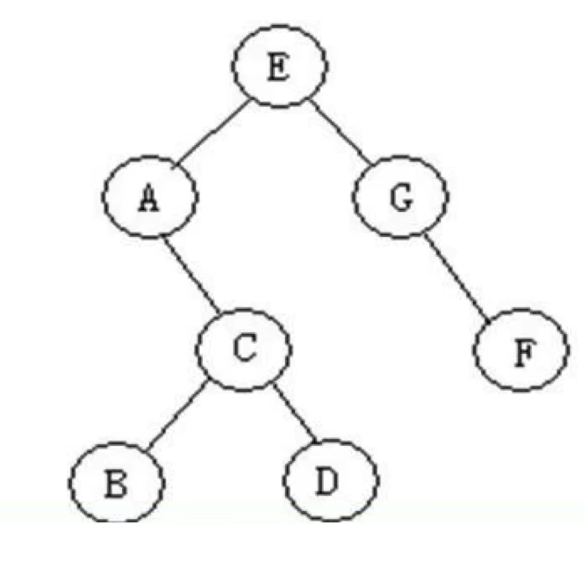

In [4]:
a = BiTreeNode('A')
b = BiTreeNode('B')
c = BiTreeNode('C')
d = BiTreeNode('D')
e = BiTreeNode('E')
f = BiTreeNode('F')
g = BiTreeNode('G')

e.lchild = a
e.rchild = g
a.rchild = c
c.lchild = b
c.rchild = d
g.rchild = f

root = e

pre_order(root)
in_order(root)
post_order(root)
level_order(root)

E,A,C,B,D,G,F,A,B,C,D,E,G,F,B,D,C,A,F,G,E,E,A,G,C,F,B,D,

### Binary search tree
- Binary Search Tree is a node-based binary tree data structure which has the following properties:

    - The left subtree of a node contains only nodes with keys lesser than the node’s key.
    - The right subtree of a node contains only nodes with keys greater than the node’s key.
    - The left and right subtree each must also be a binary search tree.
- The in ordering is already sorted!
- Time complexity: O(logn)

In [15]:
class BiTreeNode:
    def __init__(self,data):
        self.data = data
        self.lchild = None
        self.rchild = None
        self.parent = None

class BST:
    def __init__(self,li = None):
        self.root = None
        if li:
            for val in li:
                self.insert_no_rec(val)
        
    def insert(self,node,val):
        if not node:
            node = BiTreeNode(val)
        elif val < node.data:
            node.lchild = self.insert(node.lchild,val)
            node.lchild.parent = node
        elif val > node.data:
            node.rchild = self.insert(node.rchild,val)
            node.rchild.parent = node
        return node
    
    # None recursion version
    def insert_no_rec(self,val):
        p = self.root
        if not p:
            self.root = BiTreeNode(val)
            return
        while True:
            if val < p.data:
                if p.lchild:
                    p = p.lchild
                else:
                    p.lchild = BiTreeNode(val)
                    p.lchild.parent = p
                    return
            elif val > p.data:
                if p.rchild:
                    p = p.rchild
                else:
                    p.rchild = BiTreeNode(val)
                    p.rchild.parent = p
                    return
            else:
                return
    def query(self,node,val):
        if not node:
            return None
        if node.data<val:
            return self.query(node.rchild,val)
        elif node.data>val:
            return self.query(node.lchild,val)
        else:
            return node
    def query_no_rec(self,val):
        p = self.root
        while p:
            if p.data<val:
                p = p.rchild
            elif p.data>val:
                p = p.lchild
            else:
                return p
        return None
    def pre_order(self,root): 
        if root:
            print(root.data,end=',')
            pre_order(root.lchild)
            pre_order(root.rchild)

    def in_order(self,root):
        if root:
            in_order(root.lchild)
            print(root.data,end=',')
            in_order(root.rchild)

    def post_order(self,root):
        if root:
            post_order(root.lchild)
            post_order(root.rchild)
            print(root.data,end=',')
    def level_order(self,root):
        queue = deque()
        queue.append(root)
        while len(queue) > 0:
            node = queue.popleft()
            print(node.data,end=',')
            if node.lchild:
                queue.append(node.lchild)
            if node.rchild:
                queue.append(node.rchild)
    def __remove_node_1(self,node):
        # situation 1: node is leaf node
        if not node.parent:
            self.root = None
        if node == node.parent.lchild: # left child
            node.parent.lchild = None
        else: # right child
            node.parent.rchild = None
    
    def __remove_node_21(self,node):
        # situation 2.1: node only has one left child
        if not node.parent:
            self.root = node.lchild
            node.lchild.parent = None
        elif node == node.parent.lchild:
            node.parent.lchild = node.lchild
            node.lchild.parent = node.parent
        else:
            node.parent.rchil = node.lchild
            node.lchild.parent = node.parent
    def __remove_node_22(self,node):
        # situation 2.2:node only has one rchild
        if not node.parent:
            self.root = node.rchild
        elif node == node.parent.lchild:
            node.parent.lchild = node.rchild
            node.rchild.parent = node.parent
        else:
            node.parent.rchild = node.rchild
            node.rchil.parent = node.parent
    def delete(self,val):
        if self.root: #not empty tree
            node = self.query_no_rec(val)
            if not node:
                return False
            if not node.lchild and not node.rchild:
                self.__remove_node_1(node)
            elif not node.rchild:# situation 2.1
                self.__remove_node_22(node)
            elif not node.lchild:
                self.__remove_node_22(node)
            else: #both children exist
                min_node = node.rchild
                while min_node.lchild:
                    min_node = min_node.lchild
                node.data = min_node.data
                #delete min_node
                if min_node.rchild:
                    self.__remove_node_22(min_node)
                else:
                    self.__remove_node_1(min_node)

In [16]:
tree = BST([4,6,7,9,2,1,3,5,8])
tree.in_order(tree.root)
print("")
tree.delete(4)
tree.delete(8)
tree.in_order(tree.root)


1,2,3,4,5,6,7,8,9,
1,2,3,5,6,7,9,

### AVL Tree
- An AVL tree (named after inventors Adelson-Velsky and Landis) is a self-balancing binary search tree (BST)
    - The heights of the two child subtrees of any node differ by at most one
    - If at any time they differ by more than one, rebalancing is done to restore this property.
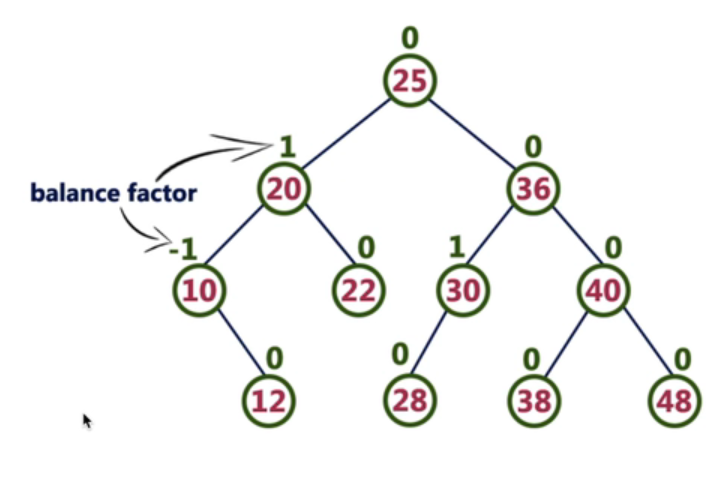
- AVL Insertion:
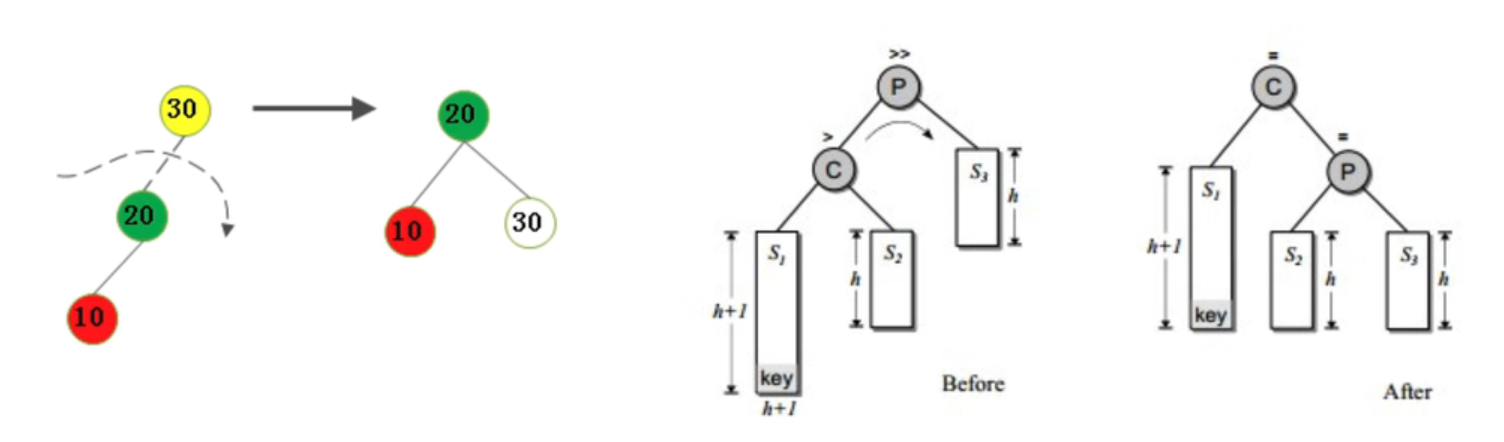
Right rotating: Unbalance is caused by insertion of left node for lchild 
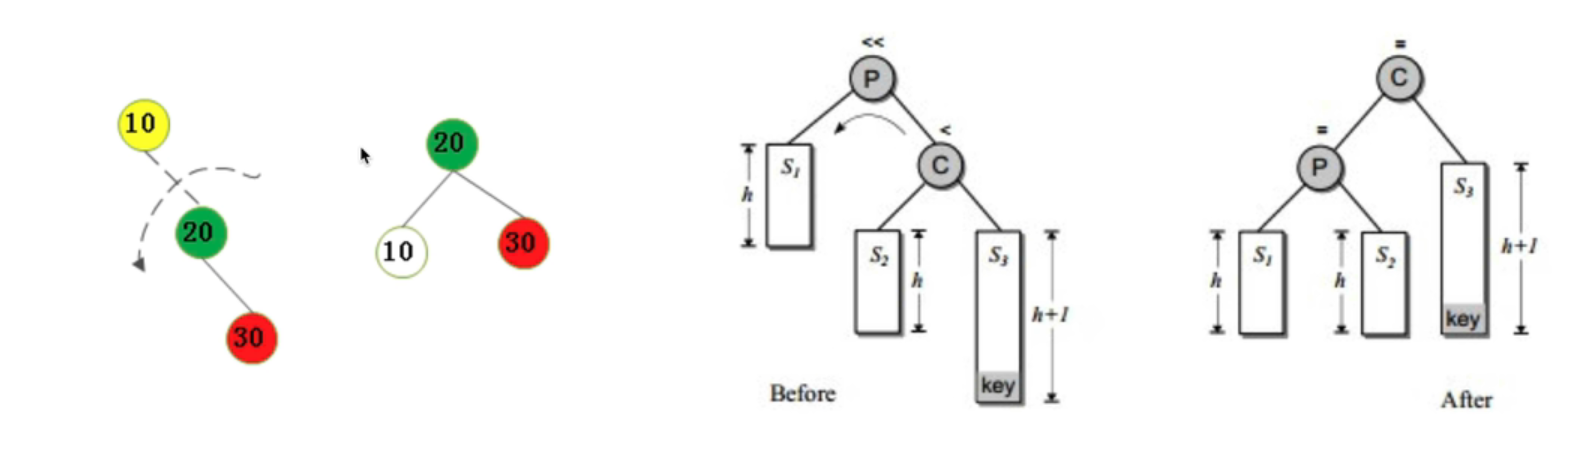
Left rotating: Unbalance is caused by insertion of right node for rchild 
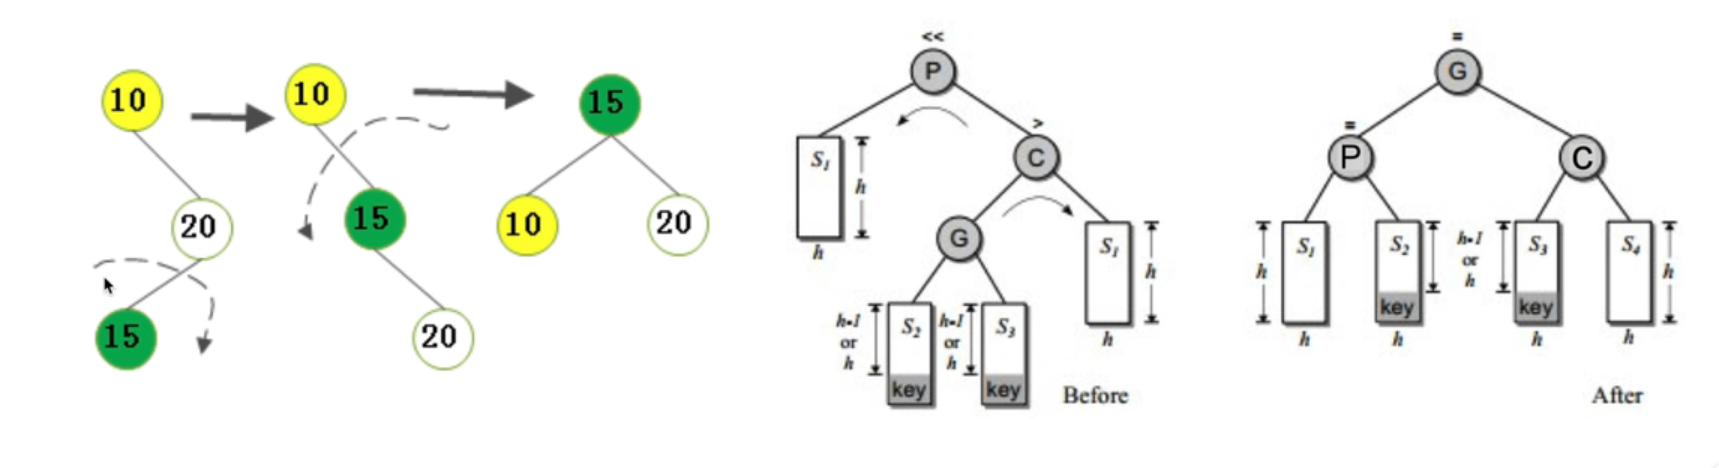
Right then Left rotating: Unbalance is caused by insertion of left node for rchild 
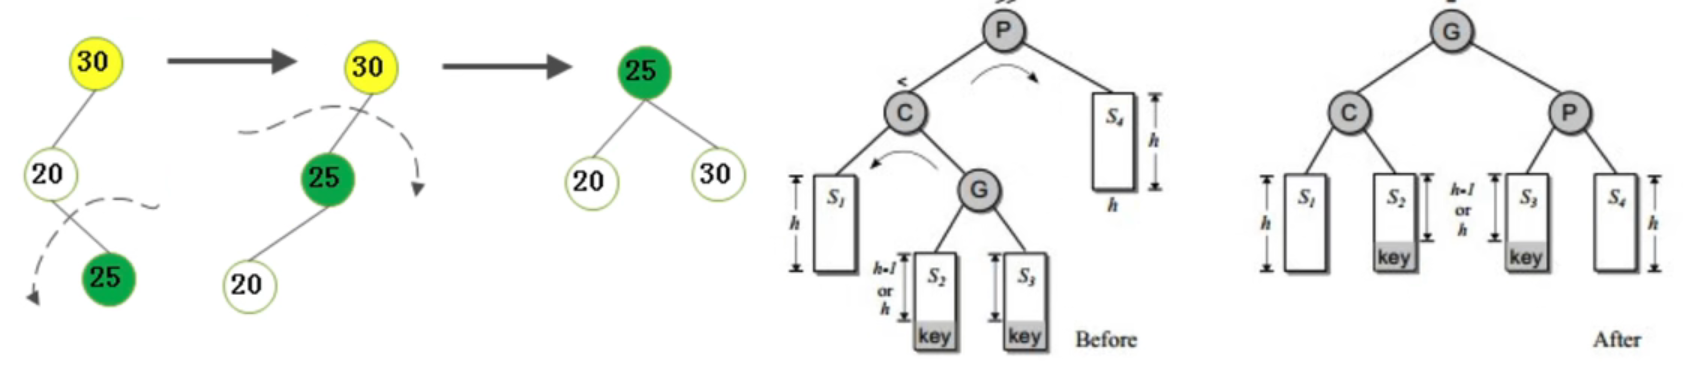
Left then Right rotating: Unbalance is caused by insertion of right node for lchild 

In [21]:
class AVLNode(BiTreeNode):
    def __init__(self,data):
        BiTreeNode.__init__(self,data)
        self.bf = 0
class AVLTree(BST):
    def __init__(self,li=None):
        BST.__init__(self,li)
        
    def rotate_left(self,p,c):
        s2 = c.lchild
        p.rchild = s2
        if s2:
            s2.parent = p
        
        c.lchild = p
        p.parent = c
        
        p.bf = 0
        c.bf = 0
        return c
    def rotate_right(self,p,c):
        s2 = c.rchild
        p.lchild = s2
        if s2:
            s2.parent = p
        
        c.rchild = p
        p.parent = c
        
        p.bf = 0
        c.bf = 0 
        return c
    def rotate_right_left(self,p,c):
        g = c.lchild
        
        s3 = g.rchild
        c.lchild = s3
        if s3:
            s3.parent = c
        g.rchild = c
        c.parent = g
        
        s2 = g.lchild
        p.rchild = s2
        if s2:
            s2.parent = p
        g.lchild = p
        p.parent = g
        
        
        #update bf
        if g.bf>0: # insert s3
            p.bf = -1
            c.bf = 0
        elif g.bf <0: #insert s2
            p.bf = 0
            c.bf = 1
        else: # insert g
            p.bf = 0
            c.bf = 0
        return g
    def rotate_left_right(self,p,c):
        g = c.rchild
        
        s2 = g.lchild
        c.rchild = s2
        if s2:
            s2.parent = c
        g.lchild = c
        c.parent = g
        
        s3 = g.rchild
        p.lchild = s3
        if s3:
            s3.parent = p
        g.rchild = p
        p.parent = g
        
        
        #update bf
        if g.bf<0: # insert s2
            p.bf = 1
            c.bf = 0
        elif g.bf >0: #insert s3
            p.bf = 0
            c.bf = -1
        else: # insert g
            p.bf = 0
            c.bf = 0        
        return g
    def insert_no_rec_AVL(self,val):
        # insert
        p = self.root
        if not p:
            self.root = BiTreeNode(val)
            return
        while True:
            if val < p.data:
                if p.lchild:
                    p = p.lchild
                else:
                    p.lchild = BiTreeNode(val)
                    p.lchild.parent = p
                    node = p.lchild
                    break
            elif val > p.data:
                if p.rchild:
                    p = p.rchild
                else:
                    p.rchild = BiTreeNode(val)
                    p.rchild.parent = p
                    node = p,rchild
                    break
            else:
                return
        
        # Update balance factor
        while node.parent:
            if node.parent.lchild == node: # from left node, left subtree is heavier
                # update node.parent bf -= 1
                if node.parent.bf < 0: # previous node.parent.bf == -1
                    # determine which side of node is heavier
                    g = node.parent.parent # for linking subree after rotation
                    x = node.parent
                    if node.bf >0:
                        n = self.rotate_left_right(node.parent,node)
                    else:
                        n = self.rotate_right(node.parent,node)
                    
                    # rmb to link back g and n
                elif node.parent.bf > 0: # previous node.parent.bf == 1
                    node.parent.bf = 0
                    break
                else: # previous node.parent.bf == 0
                    node.parent.bf = -1
                    node = node.parent
                    continue
            else: 
                # update node.parent bf += 1
                if node.parent.bf > 0: # previous node.parent.bf == 1
                    # determine which side of node is heavier
                    g = node.parent.parent # for linking subree after rotation
                    x = node.parent
                    if node.bf <0:
                        n = self.rotate_right_left(node.parent,node)
                    else:
                        n = self.rotate_left(node.parent,node)
                    
                    # rmb to link back g and n
                elif node.parent.bf < 0: # previous node.parent.bf == -1
                    node.parent.bf = 0
                    break
                else: # previous node.parent.bf == 0
                    node.parent.bf = 1
                    node = node.parent
                    continue             
            n.parent = g
            if g:
                if x == g.lchild:
                    g.lchild = n
                else:
                    g.rchild = n
                break
            else:
                self.root = n
                break